In [1]:
from base import np
from oneD import Solver1D, Solver1D_UniformBacterium

# Export figures to Folder
figures_path = "../Figures/Nutrients1D/"

## Results for different Bacterial Concentrations

In [2]:
syst_params = {
'L' : 1.0,  'T' : 0.3,  # Lenght & Time Domain
'Tc': 0.1,              # Consumption Time
'nx': 50,   'nt': 100   # Num Spatial/Temporal Points
}
L = syst_params['L']

# Initial condition for nutrients
def n0_linear(x):
    return x / L

### 1. Constant Concentration

$$C_{const}(x) = 1$$

With Analytical Solution, so that we verify the discretisation has been done correctly.

General solution:
           -√α⋅x       √α⋅x
n(x) = C₁⋅ℯ      + C₂⋅ℯ    
Particular solution:
       ⎛     2⋅√α⋅x⎞  √α⋅(L - x)
       ⎝1 - ℯ      ⎠⋅ℯ          
n(x) = ─────────────────────────
                   2⋅L⋅√α       
              1 - ℯ             
Numeric solution:
n(x) = 0.0848103993679265⋅sinh(3.16227766016838⋅x)


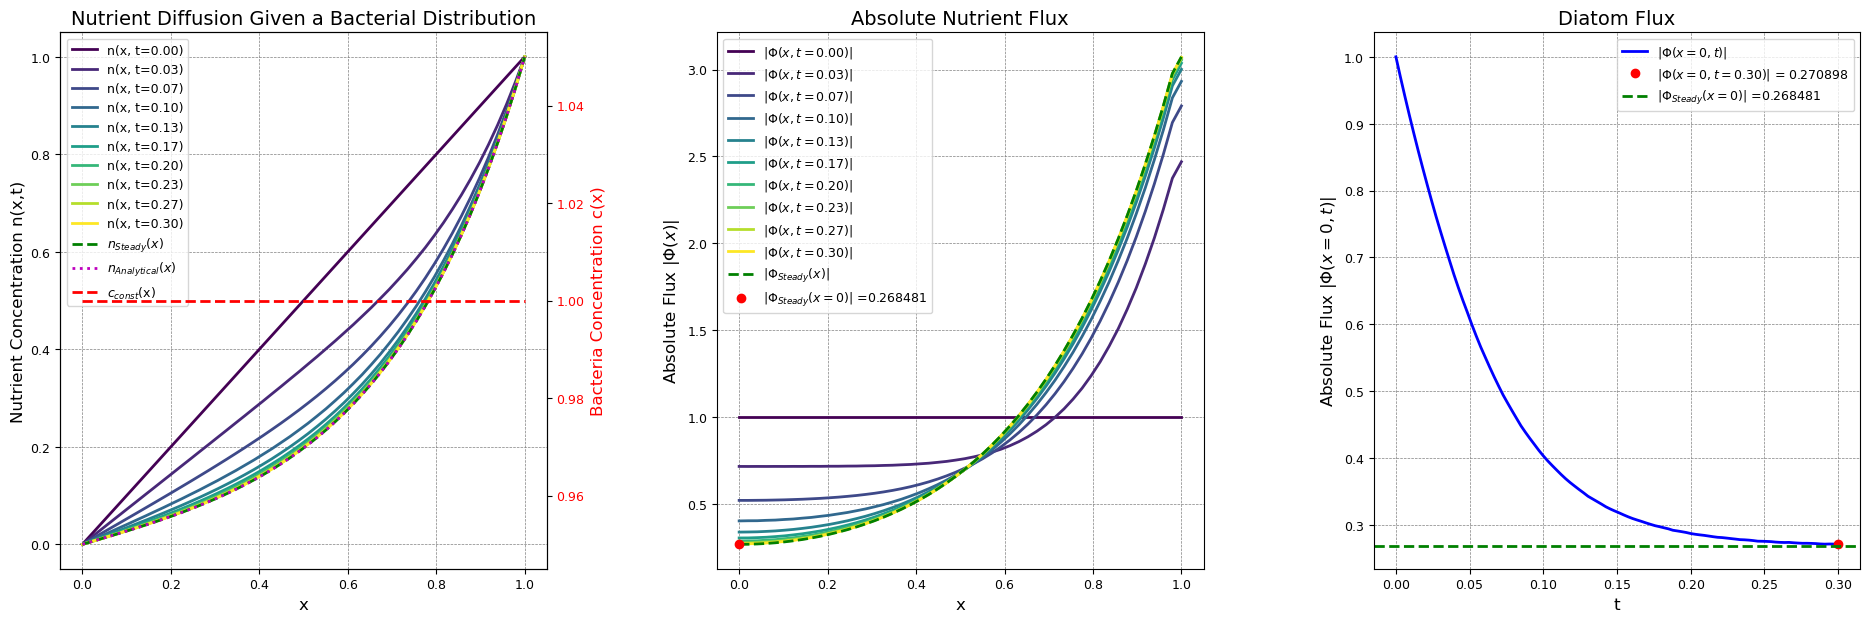

In [4]:
# Nutrient eater concentration function
def c_const(x):
    return np.ones_like(x)

# Create an instance of the class and solve the PDE
S1D_Unif = Solver1D_UniformBacterium(syst_params, n0_linear)

S1D_Unif.pde.solve()
S1D_Unif.ode.solve()
S1D_Unif.ode.analyt.solve()

S1D_Unif.ode.analyt.print_solutions()

S1D_Unif.plot.triple_plot()
S1D_Unif.plot.save(figures_path, "c_const(x)_Analyt")

### 2. Exponential Concentrations

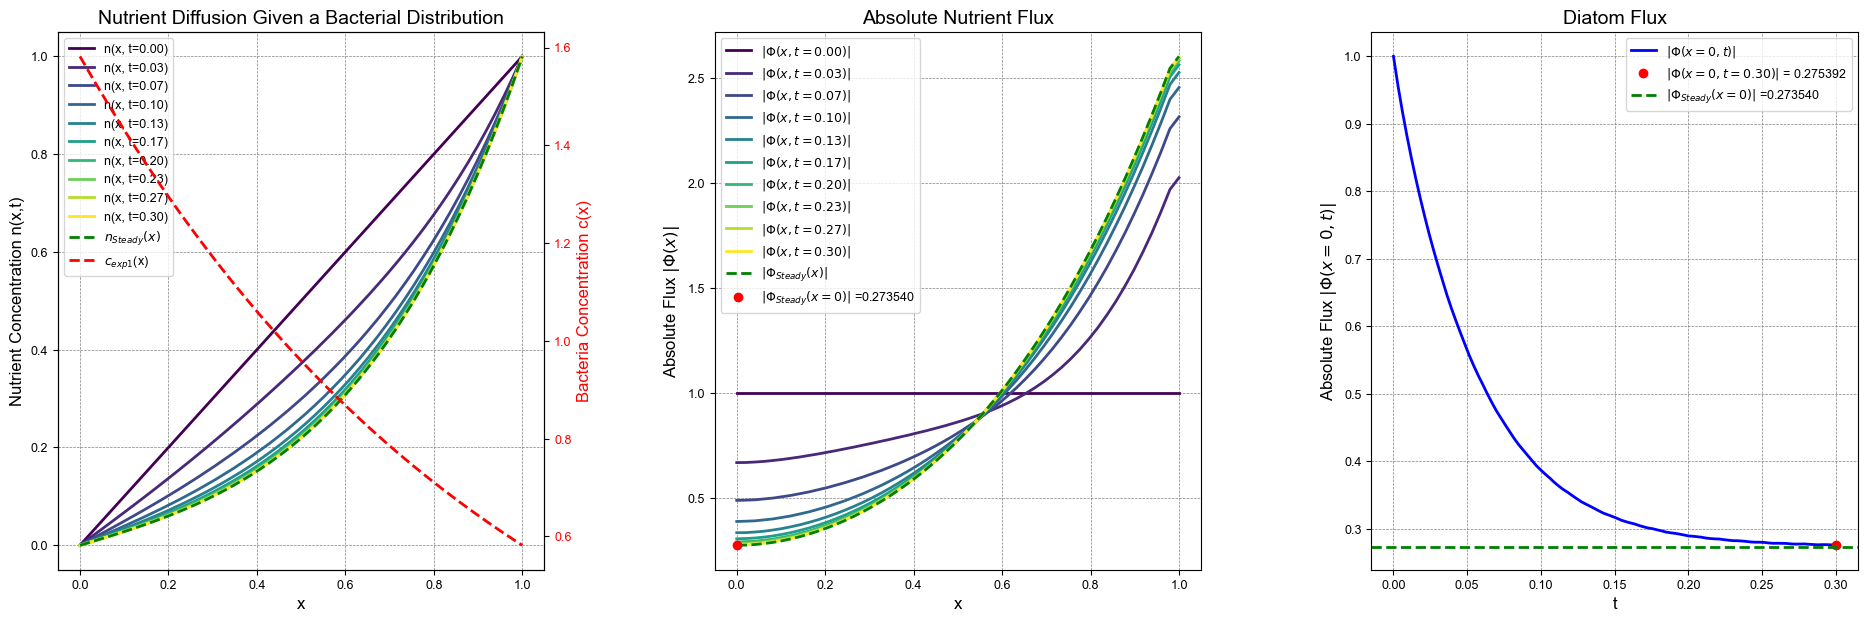

In [3]:
# Nutrient eater concentration function
def c_exp1(x):
    return np.exp(1 - x / L) / (L * (np.e - 1))

S1D = Solver1D(syst_params, c_exp1, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()

In [4]:
1/np.mean(c_exp1(S1D.x))

0.9983292485751574

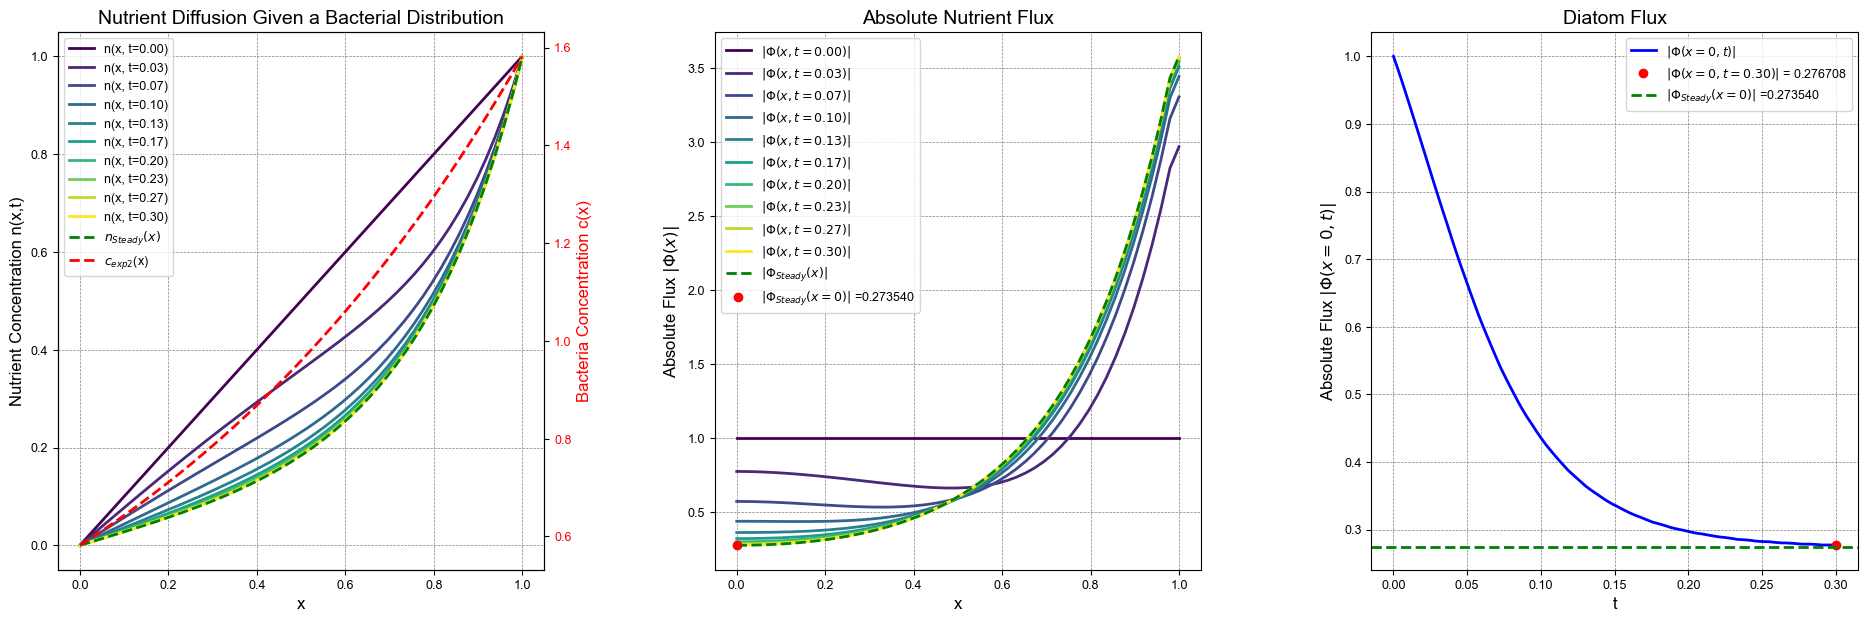

In [6]:
# Nutrient eater concentration function
def c_exp2(x):
    return np.exp(x / L) / (L * (np.e - 1))

S1D = Solver1D(syst_params, c_exp2, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()

In [ ]:
1/np.mean(c_exp2(S1D.x))

0.9983292485751576

### 3. Step Concentrations

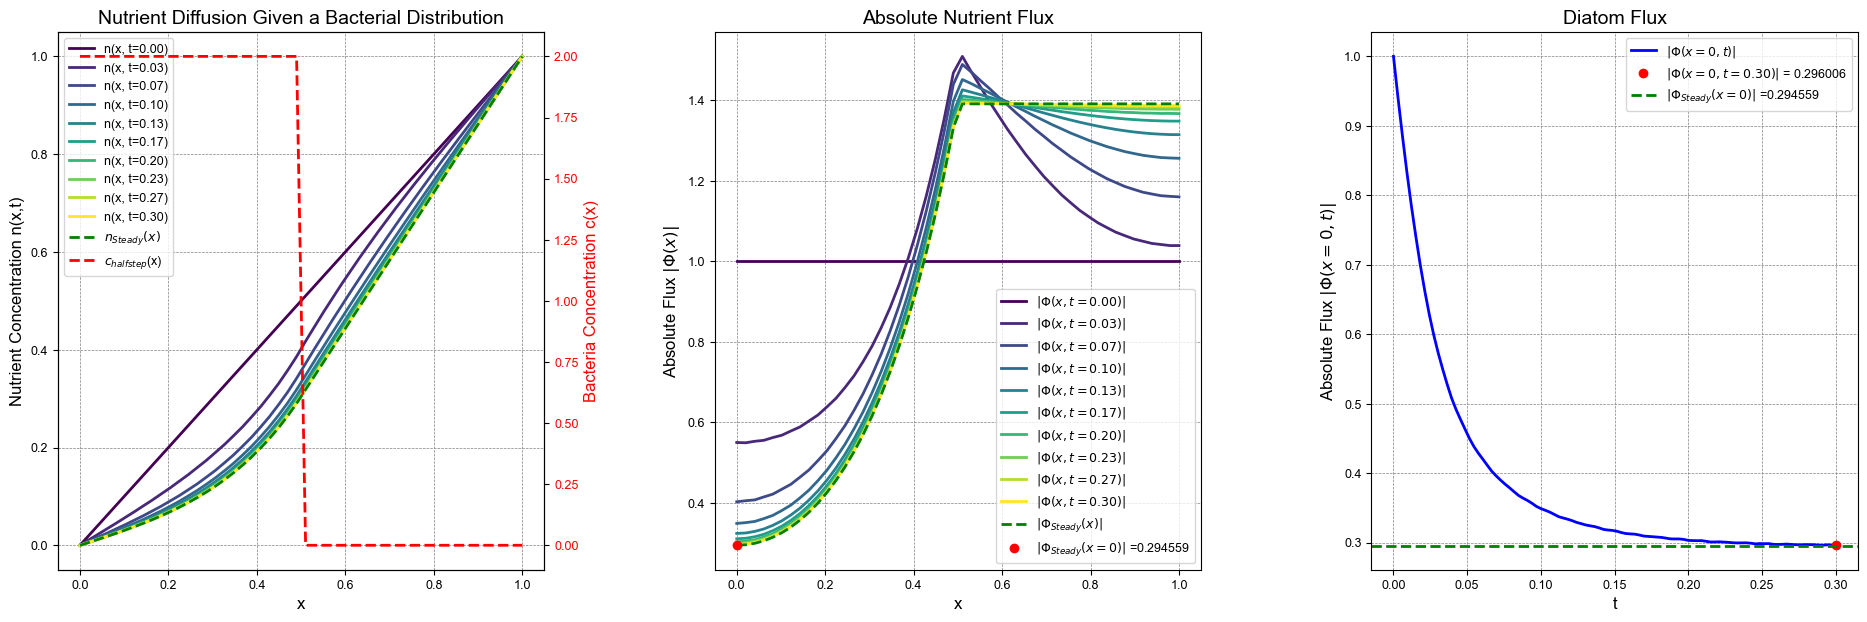

In [8]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 1 / l, 0) # 1/l if x < l, else 0

S1D = Solver1D(syst_params, c_halfstep, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()
S1D.plot.save(figures_path, "c_halfstep(x)")

In [9]:
1/np.mean(c_halfstep(S1D.x))

1.0

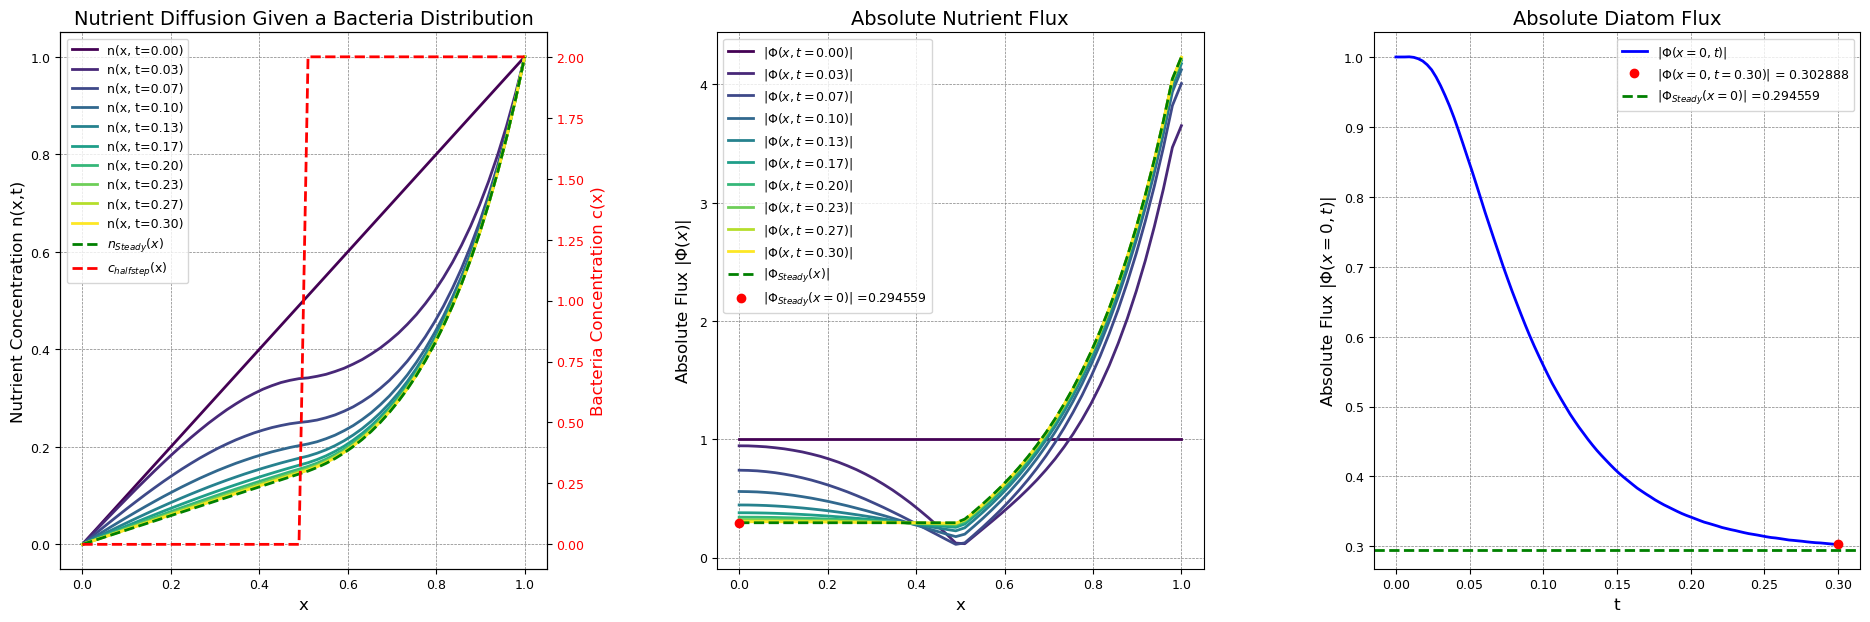

In [7]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 0, 1 / (L-l)) # 1/l if x < l, else 0

S1D = Solver1D(syst_params, c_halfstep, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()

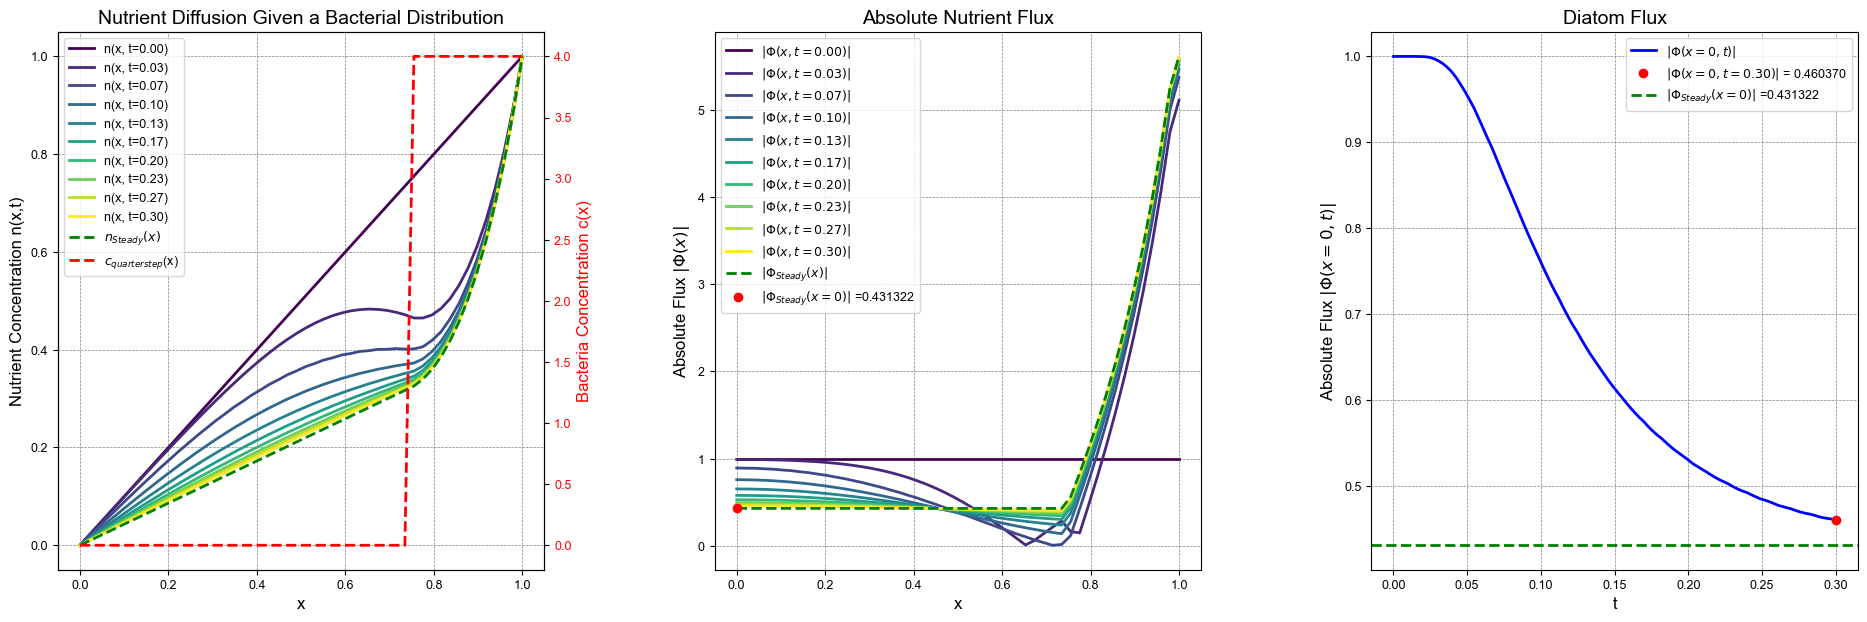

In [10]:
def c_quarterstep(x):
    l=L*3/4
    return np.where(x < l, 0, 1 / (L-l) ) # 0 if x < l, else 1/L-l

S1D = Solver1D(syst_params, c_quarterstep, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()

In [11]:
1/np.mean(c_quarterstep(S1D.x))

0.9615384615384615

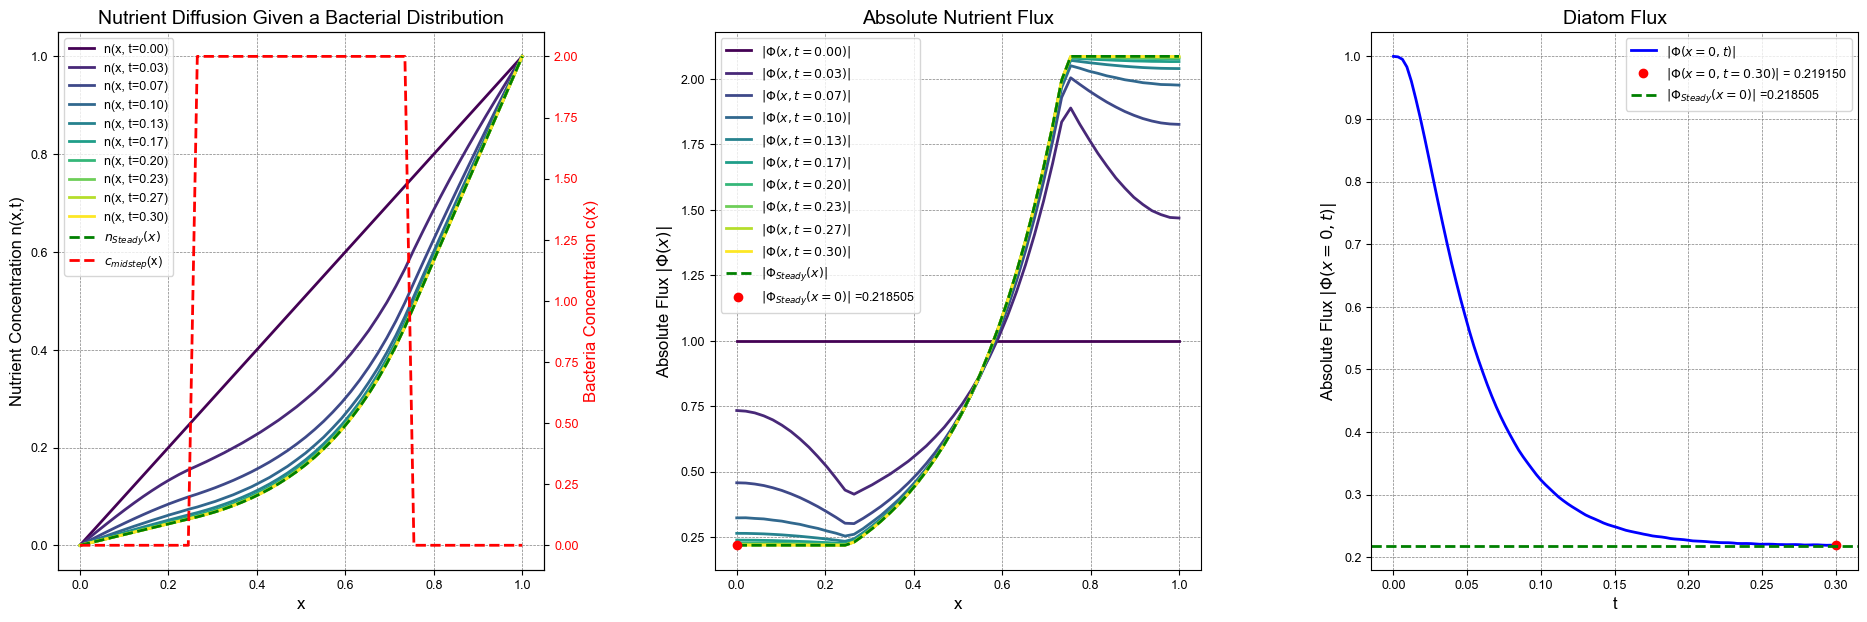

In [12]:
def c_midstep(x):
    x0 = L/4 # Starting point of the step
    l  = L/2 # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

S1D = Solver1D(syst_params, c_midstep, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()
S1D.plot.save(figures_path, "c_midstep(x)")

In [ ]:
1/np.mean(c_midstep(S1D.x))

1.0416666666666667

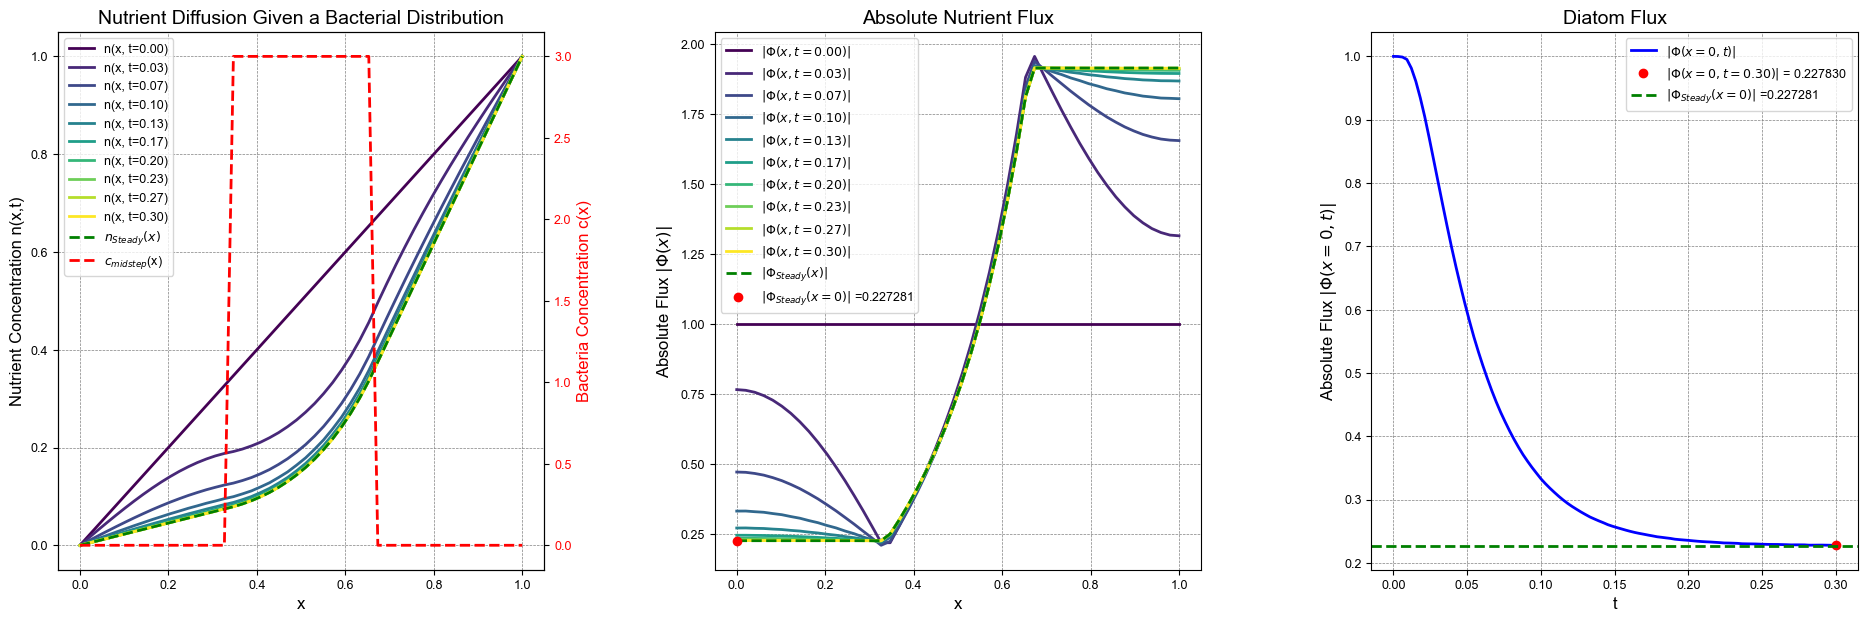

In [14]:
def c_midstep(x):
    x0 = L/3 # Starting point of the step
    l  = L/3 # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

S1D = Solver1D(syst_params, c_midstep, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()

In [16]:
1/np.mean(c_midstep(S1D.x))

1.0416666666666667

## Opposite Initial Condition

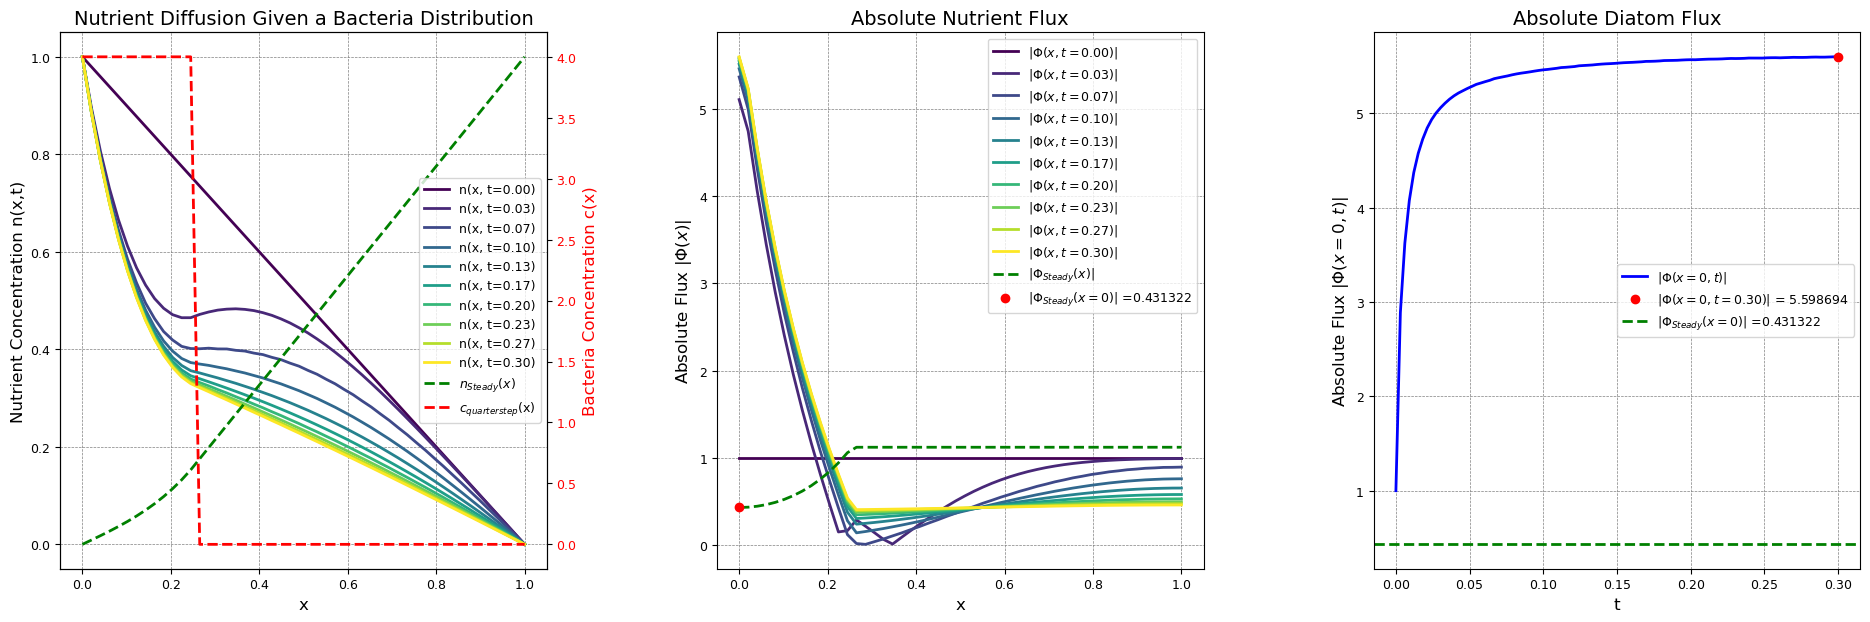

In [11]:
def n0_linear2(x):
    return 1 - x / L
def c_quarterstep(x):
    l=L/4
    return np.where(x < l, 1 / l, 0) # Nb/l if x < l, else 0

S1D = Solver1D(syst_params, c_quarterstep, n0_linear2)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()